In [67]:
#imported pandas to read dataset into data frame, perform data cleaning and analysis task, write and save back to csv file
import pandas as pd

In [68]:
#reading csv files from local to fit into the model and to perform predictions
train_df = pd.read_csv('/Users/venkatavarunnelakuditi/Downloads/icp-5-varunnh7t-master/Dataset/train.csv')
test_df = pd.read_csv('/Users/venkatavarunnelakuditi/Downloads/icp-5-varunnh7t-master/Dataset/test.csv')

In [69]:
#looking into columns names of the data frame
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [70]:
#looking into top 5 records of the data frame to know about data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
#looking into datatypes and null values present in  each column
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [60]:
#getting statastical insights of data
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [61]:
#Analyze by pivoting features ---> the higher the number means more correlation with the target
#1)Find the correlation between ‘survived’ (target column) and ‘sex’ column for the Titanic use case in class.
print(train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print('_'*20)

      Sex  Survived
0  female  0.742038
1    male  0.188908
____________________


In [62]:
"a. Do you think we should keep this feature?"
"yes, while calculating corelation between columns vs Survived, we got sex vs survived as highest so we shoud keep this value to get more accurate prediction"
#maping string values of Sex columns to numeric data and getting correlation value between Survived and sexx colunms
print(train_df["Survived"].corr(train_df['Sex'].map({'male':0,'female':1})))

0.5433513806577555


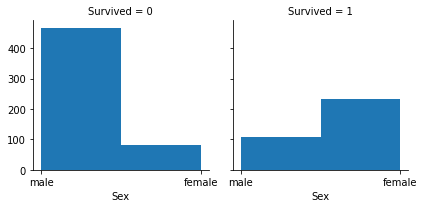

In [21]:
#2)Do at least two visualizations to describe or show correlations. (e.g.: Survived: Class and gender).
# libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt
#plotting sex vs survived to visualize co-relation and found more county of men were died while comparing to the women is obtained
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Sex', bins=2)

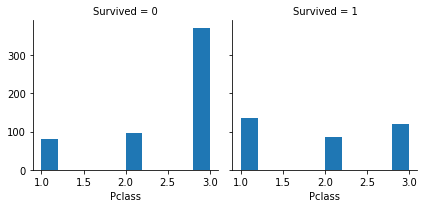

In [63]:
#plotting Pclass vs survived to visualize co-relation and founde that more number of third class passengers didn't survived

g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Pclass', bins=10)